In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [52]:
countryData = pd.read_csv('/content/250 Country Data.csv', index_col=0)
countryData.head()

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN


In [53]:
countryData['Real Growth Rating(%)'] = countryData['Real Growth Rating(%)'].str.extract('(\S+)%')[0].str.replace('–', '-').astype(float)
countryData['Literacy Rate(%)'] = countryData['Literacy Rate(%)'].str.extract('(\S+)%')[0].str.replace('–', '-').astype(float)
countryData['Inflation(%)'] = countryData['Inflation(%)'].str.extract('(\S+)%')[0].str.replace('–', '-').astype(float)
countryData['Unemployement(%)'] = countryData['Unemployement(%)'].str.extract('(\d+\.?\d*)\D*%')[0].str.replace('–', '-').astype(float)
countryData.head()

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1,28.1,6.8,35.0
1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,0.7,98.7,1.7,16.9
3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1,79.0,3.9,10.3
4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3.0,97.0,NaN,NaN


In [54]:
countryData.isna().sum()

name                       0
region                     2
subregion                  3
population                 0
area                      10
gini                      97
Real Growth Rating(%)     85
Literacy Rate(%)          77
Inflation(%)              87
Unemployement(%)         101
dtype: int64

In [55]:
countryData[countryData['subregion'].isna()]

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
8,Antarctica,Polar,NaN,1000,14000000.0,NaN,NaN,NaN,NaN,NaN
30,Bouvet Island,NaN,NaN,0,49.0,NaN,NaN,NaN,NaN,NaN
98,Heard Island and McDonald Islands,NaN,NaN,0,412.0,NaN,NaN,NaN,NaN,NaN


The columns are mostly NaNs to we can simply drop them

In [56]:
countryData = countryData.drop(countryData[countryData['subregion'].isna()].index)

In [57]:
countryData.isna().sum()

name                      0
region                    0
subregion                 0
population                0
area                     10
gini                     94
Real Growth Rating(%)    82
Literacy Rate(%)         74
Inflation(%)             84
Unemployement(%)         98
dtype: int64

NaN areas can be simply obtained from Google to avoid losing information.

In [42]:
indicies = countryData[countryData['area'].isna()]['area'].index 
countryData.loc[indicies, 'area'] = [34.2, 83534, 1628, 1128, 374, 6220, 2512, 420, 3903, 61399]
countryData.loc[indicies]

,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
33,United States Minor Outlying Islands,Americas,Northern America,300,34.2,NaN,NaN,NaN,NaN,NaN
78,French Guiana,Americas,South America,254541,83534.0,NaN,NaN,NaN,NaN,NaN
90,Guadeloupe,Americas,Caribbean,400132,1628.0,NaN,NaN,98.0,NaN,27.8
140,Martinique,Americas,Caribbean,378243,1128.0,NaN,NaN,97.7,3.9,27.2
143,Mayotte,Africa,Eastern Africa,226915,374.0,NaN,NaN,NaN,NaN,38.0
171,"Palestine, State of",Asia,Western Asia,4682467,6220.0,35.5,NaN,NaN,NaN,NaN
183,Réunion,Africa,Eastern Africa,840974,2512.0,NaN,2.5,89.0,NaN,36.0
188,"Saint Helena, Ascension and Tristan da Cunha",Africa,Western Africa,4255,420.0,NaN,NaN,NaN,NaN,NaN
209,South Georgia and the South Sandwich Islands,Americas,South America,30,3903.0,NaN,NaN,NaN,NaN,NaN
216,Svalbard and Jan Mayen,Europe,Northern Europe,2562,61399.0,NaN,NaN,NaN,NaN,NaN


The rest of the missing data is replaced with the mean for each column as it is more than 3% of the data and cannot be dropped or obtained.

In [48]:
countryData.fillna(countryData.mean(), inplace=True)

In [49]:
countryData.isna().sum()

name                     0
region                   0
subregion                0
population               0
area                     0
gini                     0
Real Growth Rating(%)    0
Literacy Rate(%)         0
Inflation(%)             0
Unemployement(%)         0
dtype: int64

#Least 10 Illiterate Countries

0    19.1
1    27.0
2    28.1
3    28.7
4    33.4
5    35.4
6    37.8
7    39.0
8    41.0
9    42.4
Name: Literacy Rate(%), dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

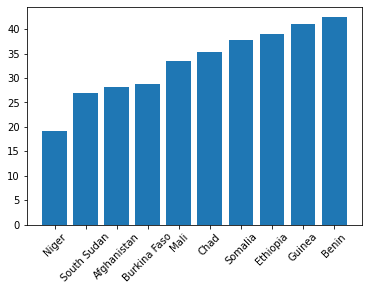

In [71]:
literacyTop10 = countryData.sort_values('Literacy Rate(%)', ascending=True, ignore_index=True)[:10]
print(literacyTop10['Literacy Rate(%)'])
plt.bar(literacyTop10['name'], literacyTop10['Literacy Rate(%)'])
plt.xticks(rotation=45)

##Correlation Matrix
We can have an overview of which variables are correlated by using the correlation matrix

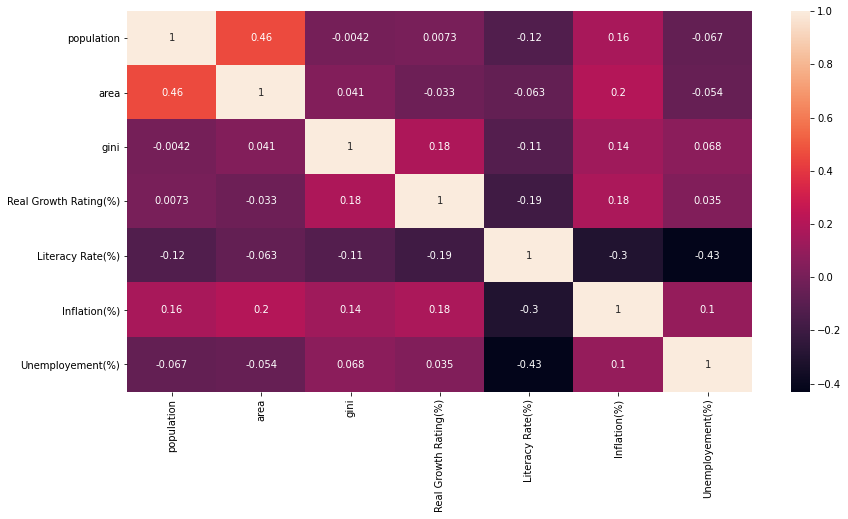

In [78]:
import seaborn as sn
plt.figure(figsize=(14,7))
sn.heatmap(countryData.corr(), annot=True)

There is a strong correlation between area and population which is trivial.

There is also a clear negative Correlation between Literacy Rate and Unemployment Percentage, lets plot it!


##Literacy VS Unemploymnet

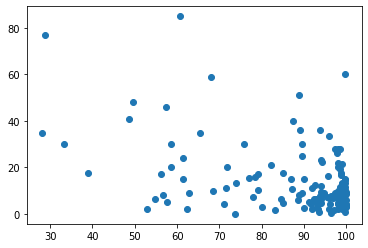

In [76]:
plt.scatter(countryData['Literacy Rate(%)'], countryData['Unemployement(%)'])

It is clear that the lower the literacy rate, the higher the unemplyment percentage is.

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

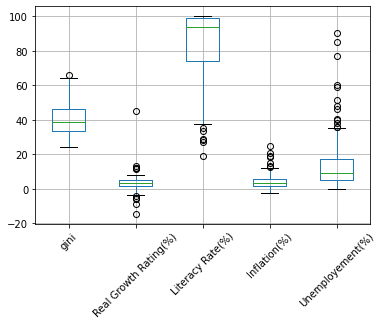

In [97]:
countryData.boxplot(column=['gini','Real Growth Rating(%)', 'Literacy Rate(%)', 'Inflation(%)','Unemployement(%)'])
plt.xticks(rotation=45)

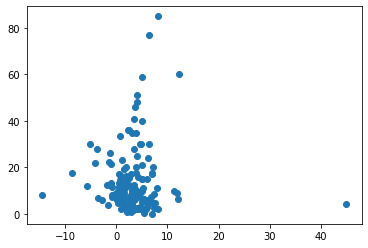

In [100]:
plt.scatter(countryData['Real Growth Rating(%)'], countryData['Unemployement(%)'])

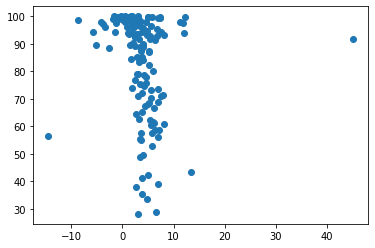

In [101]:
plt.scatter(countryData['Real Growth Rating(%)'], countryData['Literacy Rate(%)'])

Possible Questions:
